In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbs
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.model_selection import train_test_split
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn.grid_search import GridSearchCV

In [2]:
data = pd.read_csv('churn.csv')
data = data.drop('customerID', axis=1)
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
t =(data['TotalCharges']==' ')
zer = [i for i, x in enumerate(t) if x]
data = data.drop(data.index[zer])
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'])
len(data)

7032

In [4]:
data_sub = data.select_dtypes(include='O')

In [5]:
for i in data_sub:
    print(set(data[i]))

{'Female', 'Male'}
{'Yes', 'No'}
{'Yes', 'No'}
{'Yes', 'No'}
{'Yes', 'No phone service', 'No'}
{'DSL', 'Fiber optic', 'No'}
{'Yes', 'No internet service', 'No'}
{'Yes', 'No internet service', 'No'}
{'Yes', 'No internet service', 'No'}
{'Yes', 'No internet service', 'No'}
{'Yes', 'No internet service', 'No'}
{'Yes', 'No internet service', 'No'}
{'Two year', 'One year', 'Month-to-month'}
{'Yes', 'No'}
{'Credit card (automatic)', 'Bank transfer (automatic)', 'Mailed check', 'Electronic check'}
{'Yes', 'No'}


In [6]:
data.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [7]:
col = list(data.select_dtypes(include='object'))
col = col[0:-1]
data_encoded = pd.get_dummies(data, columns=col)

In [8]:
(x_train, x_test, y_train, y_test) = train_test_split(data_encoded.drop(['Churn'], axis=1), data_encoded['Churn'], test_size=0.33, random_state=1987)

## K-Nearest Neighbor Model

In [23]:
k_list = np.array(range(1,50))
odd_k = [x for x in k_list if x % 2 != 0]

In [24]:
cv_scores = []
for k in odd_k:
    knn_model = knn(n_neighbors=k)
    scores = cross_val_score(knn_model, x_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

In [25]:
mse = [1 - x for x in cv_scores]
k = odd_k[mse.index(min(mse))]
print(k)

27


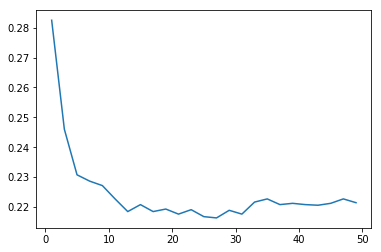

In [27]:
plt.plot(odd_k, mse)

In [49]:
knn_model = knn(n_neighbors=k)
knn_model.fit(x_train, y_train)
pred = knn_model.predict(x_test)
print("KNN accuracy score is: %s%%." % (round(accuracy_score(y_test, pred)*100, 2)))

KNN accuracy score is: 76.73%.


## Random Forest

In [ ]:
rfc_model = rfc(oob_score = True)


param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

cv_rfc = GridSearchCV(estimator=rfc_model, param_grid=param_grid, cv=10)
cv_rfc.fit(x_train, y_train)

In [ ]:
print(cv_rfc.best_params_)